In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


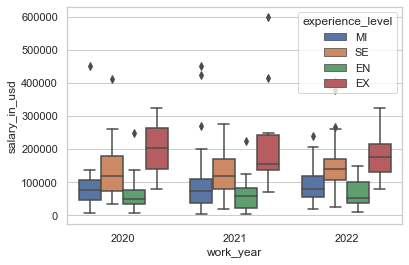

In [6]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="work_year", y="salary_in_usd", hue="experience_level",data=df)

#

comparing between salary(USD) across 2020-2021-2022 with 3 different experience levels ranging from entry to expert we find that as expected
experts enjoyed the highest grossing salary followed by seniors then mid level then entry across the 3 years,
but we also find that theres a slight decrease in the overall salaries from 2020 to 2022 for experts, in example some experts in 2020 almost hit above 270k salary but in 2022 the highest for experts is barely scratching 200k 
that is almost a 50-70k decrease overall, the same is for seniors but that changes for entry and mid levels as they have seen a slight increase in the overall salary,
with entry levels in 2020 barely hitting a 100k while in 2022 some did hit a 100k salary.


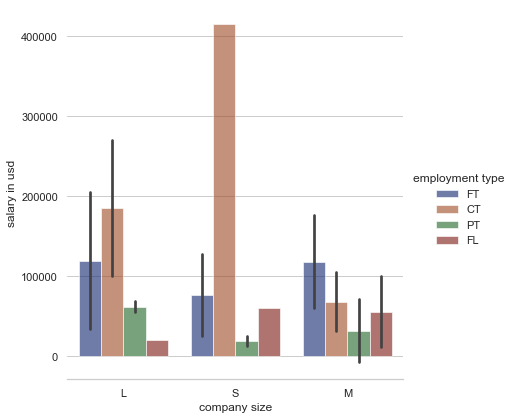

In [9]:
g = sns.catplot(
    data=df, kind="bar",
    x="company_size", y="salary_in_usd", hue="employment_type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("company size", "salary in usd")
g.legend.set_title("employment type")

# as seen by the analysis chart below that relates salary(USD) with company size and employment type,
# we find that for large companies and small companies the contract employment offers the most salary, with small companies offering contracts above 400k (HOW?!),
# for medium companies the pattern is not the same since the full time employment is the one that offers the highest salary but that is followed by contracts then freelance then part-time,
# we also see a pattern with the given data that freelancing with small-middle companies does offers a higher salary than freelancing with larger companies which makes sense since small(specially startups) to med companies do depend on freelancers alot
# also Part-time employment can be seen offering a really low salary compared to other employment types in medium and small companies.

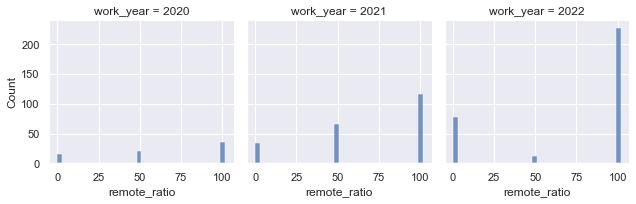

In [21]:
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="remote_ratio", col="work_year",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

# as seen in the analysis chart below working remotely has been on a steady incline from 2020 to 2022 since the pandemic has made remote working a standard thing so more and more companies 
# are offering remote jobs  which can be seen as it started in 2020 with 50% (partial remote work) and 100% (full remote work) starting to go up in numbers (PANDEMIC!) with 2021 the incline is even more
# with remote jobs being the most jobs on the market then comes 2022 with the pandemic going down a bit returning to normal can be seen as under 20% remote jobs rise in numbers but some companies still offer full remote jobs depening on the type of job.